<a href="https://colab.research.google.com/github/kamranShah-ux/kamrans_code/blob/main/Stock_Market_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Fetch stock data
ticker = 'TSLA'
df = yf.download(ticker, start='2015-01-01', end=datetime.now())
data = df[['Close']].dropna()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Prepare training and testing datasets
training_data_len = int(len(scaled_data) * 0.9)
train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 60:]

# Create sliding window datasets
def create_dataset(data, lookback=60):
    x, y = [], []
    for i in range(lookback, len(data)):
        x.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data)
x_test, y_test = create_dataset(test_data)

# Reshape for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Flatten the data for scatter plot
x_train_flat = x_train.reshape(x_train.shape[0], -1) # Flatten x_train
x_test_flat = x_test.reshape(x_test.shape[0], -1)   # Flatten x_test


# Output the size of the training and testing data
print(" ")
print(f"Total Data: {data.shape[0]}")
print(f"Training Data: {x_train.shape[0]}")
print(f"Testing Data: {x_test.shape[0]}")

[*********************100%***********************]  1 of 1 completed

 
Total Data: 2502
Training Data: 2191
Testing Data: 251


In [ ]:
# Build Bidirectional LSTM with attention mechanism
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)), input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping and learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.1,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 1.8111 - val_loss: 0.3514 - learning_rate: 0.0010
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - loss: 0.2203 - val_loss: 0.0319 - learning_rate: 0.0010
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - loss: 0.0203 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - loss: 0.0048 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - loss: 0.0036 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - loss: 0.0031 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - loss: 0.0031 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - loss: 0.0023 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - loss: 0.0030 - val_loss: 0.0052 - learning_rate:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 256)             │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 655,793 (2.50 MB)

 Trainable params: 218,597 (853.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,196 (1.67 MB)

In [ ]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

# Daily returns and risk metrics
returns = np.diff(np.log(y_test_actual.flatten()))
volatility = np.std(returns) * np.sqrt(252)
cumulative_returns = np.exp(np.cumsum(returns))
drawdowns = (cumulative_returns / np.maximum.accumulate(cumulative_returns)) - 1
max_drawdown = np.min(drawdowns)
prob_loss = np.mean(returns < 0) * 100
expected_roi = np.mean(returns) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

print("\nKey Metrics:")
print(f"1. Probability of a Loss: {prob_loss:.2f}%")
print(f"2. Expected Daily ROI: {expected_roi:.2f}%")
print(f"3. Maximum Drawdown: {max_drawdown:.2%}")
print(f"4. Annualized Volatility: {volatility:.2%}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
RMSE: 14.69
MAE: 10.64

Key Metrics:
1. Probability of a Loss: 48.80%
2. Expected Daily ROI: 0.22%
3. Maximum Drawdown: -45.67%
4. Annualized Volatility: 60.88%


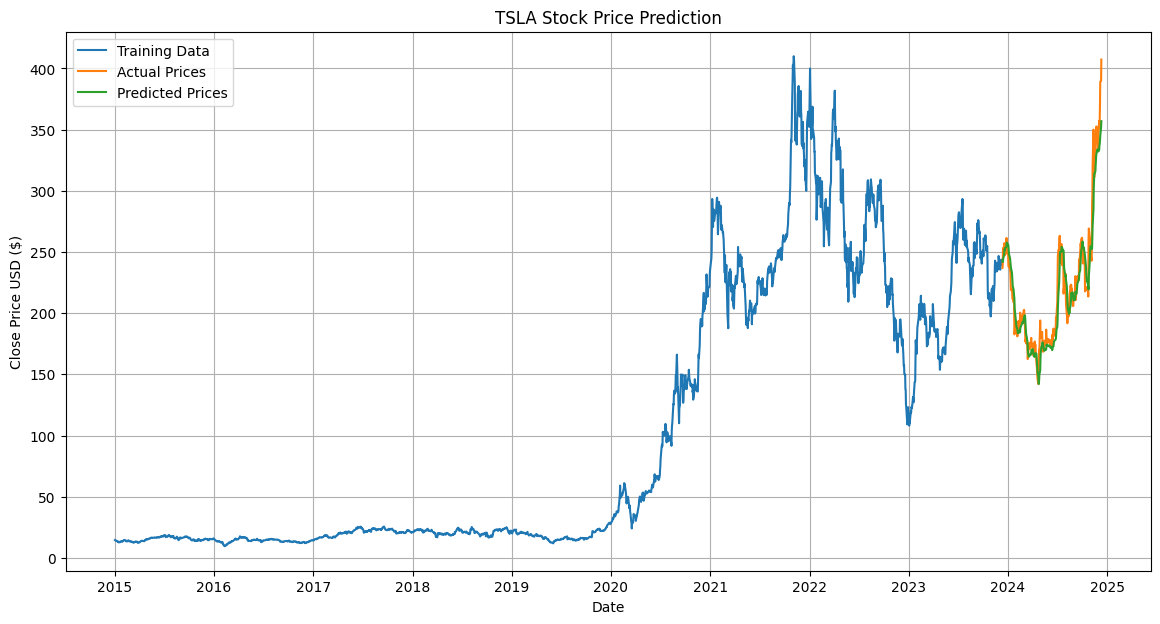

In [ ]:
# Prepare data for visualization
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Prices')
plt.plot(valid['Predictions'], label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.grid(True)
plt.show()


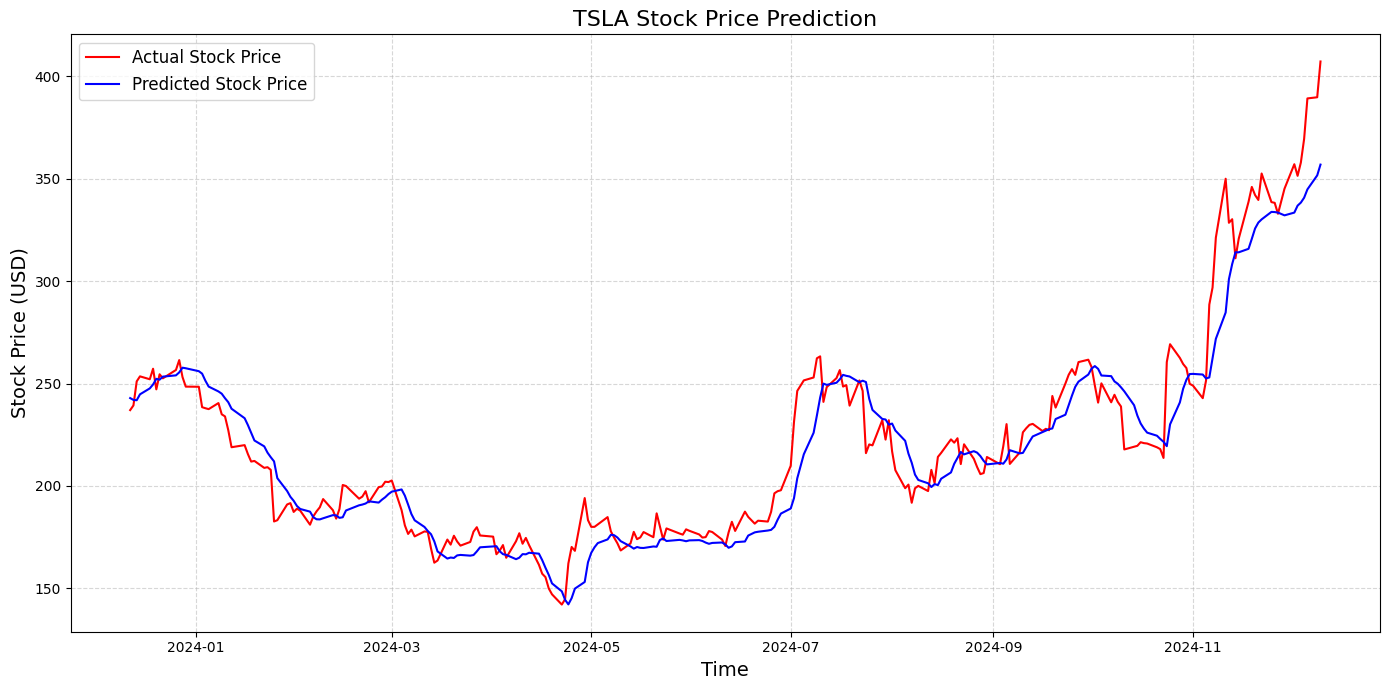

In [ ]:
# Prepare data for visualization
train = data[:training_data_len]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Plot actual vs. predicted prices (Simplilearn-style)
plt.figure(figsize=(14, 7))  # Adjust size for clarity
plt.plot(valid['Close'], color='red', label='Actual Stock Price')
plt.plot(valid['Predictions'], color='blue', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Add a subtle grid
plt.tight_layout()
plt.show()


In [ ]:
# Forecast future stock prices
future_days = 7
future_input = scaled_data[-60:]
future_input = future_input.reshape(1, 60, 1)

future_predictions = []
for _ in range(future_days):
    next_pred = model.predict(future_input)
    future_predictions.append(scaler.inverse_transform(next_pred)[0][0])
    future_input = np.append(future_input[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

# Display future predictions
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: ${price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Day 1: $364.02
Day 2: $361.42
Day 3: $358.69
Day 4: $355.92
Day 5: $353.14
Day 6: $350.41
Day 7: $347.76


Analyzing Tesla (TSLA)...


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Analyzing NVIDIA (NVDA)...


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Analyzing Apple (AAPL)...


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Analyzing Amazon (AMZN)...


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Analyzing Microsoft (MSFT)...


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Investment Analysis:
Tesla:
  Expected ROI: -2.90%
  Volatility: 0.03%
  Predicted Prices: $369.56, $367.99, $366.26, $364.44, $362.56, $360.69, $358.84

NVIDIA:
  Expected ROI: -4.76%
  Volatility: 0.07%
  Predicted Prices: $133.40, $132.22, $131.08, $129.99, $128.95, $127.97, $127.05

Apple:
  Expected ROI: -2.78%
  Volatility: 0.03%
  Predicted Prices: $237.05, $235.89, $234.74, $233.60, $232.51, $231.46, $230.47

Amazon:
  Expected ROI: -3.43%
  Volatility: 0.02%
  Predicted Prices: $213.76, $212.53, $211.26, $210.00, $208.77, $207.57, $206.43

Microsoft:
  Expected ROI: -1.96%
  Volatility: 0.01%
  Predicted Prices: $431.89, $430.49, $429.06, $427.61, $426.17, $424.78, $423.43

Recommendation: Based on the analysis, consider investing in Microsoft with an expected ROI of -1.96%.


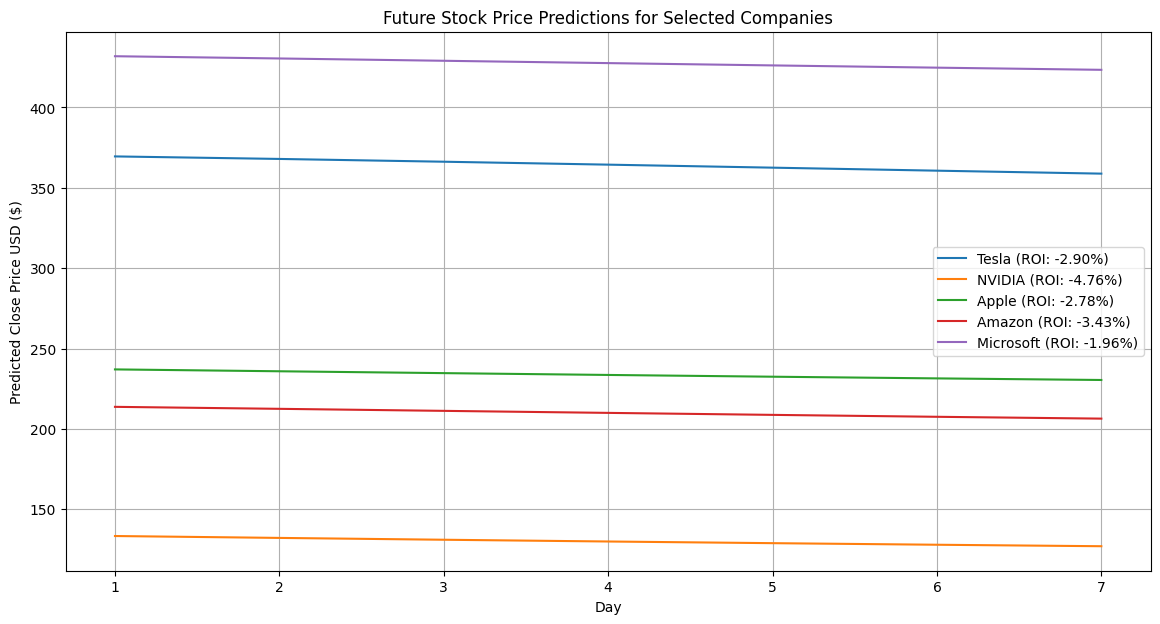

In [ ]:
# List of companies to analyze
companies = {
    "Tesla": "TSLA",
    "NVIDIA": "NVDA",
    "Apple": "AAPL",
    "Amazon": "AMZN",
    "Microsoft": "MSFT"
}

# Initialize a dictionary to store results
investment_analysis = {}

# Analyze each company
for company, ticker in companies.items():
    print(f"Analyzing {company} ({ticker})...")

    # Fetch stock data
    stock_data = yf.download(ticker, start='2022-01-01', end=datetime.now())
    data = stock_data[['Close']].dropna()

    # Scale the data
    scaled_data = scaler.fit_transform(data.values)
    future_input = scaled_data[-60:].reshape(1, 60, 1)

    # Forecast future prices (next 7 days)
    future_predictions = []
    for _ in range(7):
        next_pred = model.predict(future_input)
        future_predictions.append(scaler.inverse_transform(next_pred)[0][0])
        next_pred_reshaped = next_pred.reshape(1, 1, 1)
        future_input = np.append(future_input[:, 1:, :], next_pred_reshaped, axis=1)

    # Calculate metrics
    expected_roi = (future_predictions[-1] - future_predictions[0]) / future_predictions[0] * 100
    volatility = np.std(np.diff(future_predictions)) / np.mean(future_predictions) * 100

    # Store results
    investment_analysis[company] = {
        "Expected ROI (%)": expected_roi,
        "Volatility (%)": volatility,
        "Predicted Prices": future_predictions
    }

# Compare companies and find the best investment
best_investment = max(investment_analysis, key=lambda x: investment_analysis[x]["Expected ROI (%)"])

# Display results
print("\nInvestment Analysis:")
for company, metrics in investment_analysis.items():
    print(f"{company}:")
    print(f"  Expected ROI: {metrics['Expected ROI (%)']:.2f}%")
    print(f"  Volatility: {metrics['Volatility (%)']:.2f}%")
    print(f"  Predicted Prices: {', '.join([f'${price:.2f}' for price in metrics['Predicted Prices']])}")
    print()

print(f"Recommendation: Based on the analysis, consider investing in {best_investment} with an expected ROI of {investment_analysis[best_investment]['Expected ROI (%)']:.2f}%.")

# Optional: Plot predicted prices for each company
plt.figure(figsize=(14, 7))
for company, metrics in investment_analysis.items():
    plt.plot(range(1, 8), metrics["Predicted Prices"], label=f"{company} (ROI: {metrics['Expected ROI (%)']:.2f}%)")
plt.title("Future Stock Price Predictions for Selected Companies")
plt.xlabel("Day")
plt.ylabel("Predicted Close Price USD ($)")
plt.legend()
plt.grid(True)
plt.show()

